In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
selected_dataframe = pd.read_csv("types_stats_data.csv", delimiter=",")

As an inital step, let's take a look at the distribution of types throughout the pokemon. Each Pokemon has at least one type and at most two types. Though conventional explanations of pokemon types conclude that there is no different between a type being primary listed type and the secondary listed type, we'll break the down into these categories anyway just to see if there is some kind of pattern.

<BarContainer object of 18 artists>

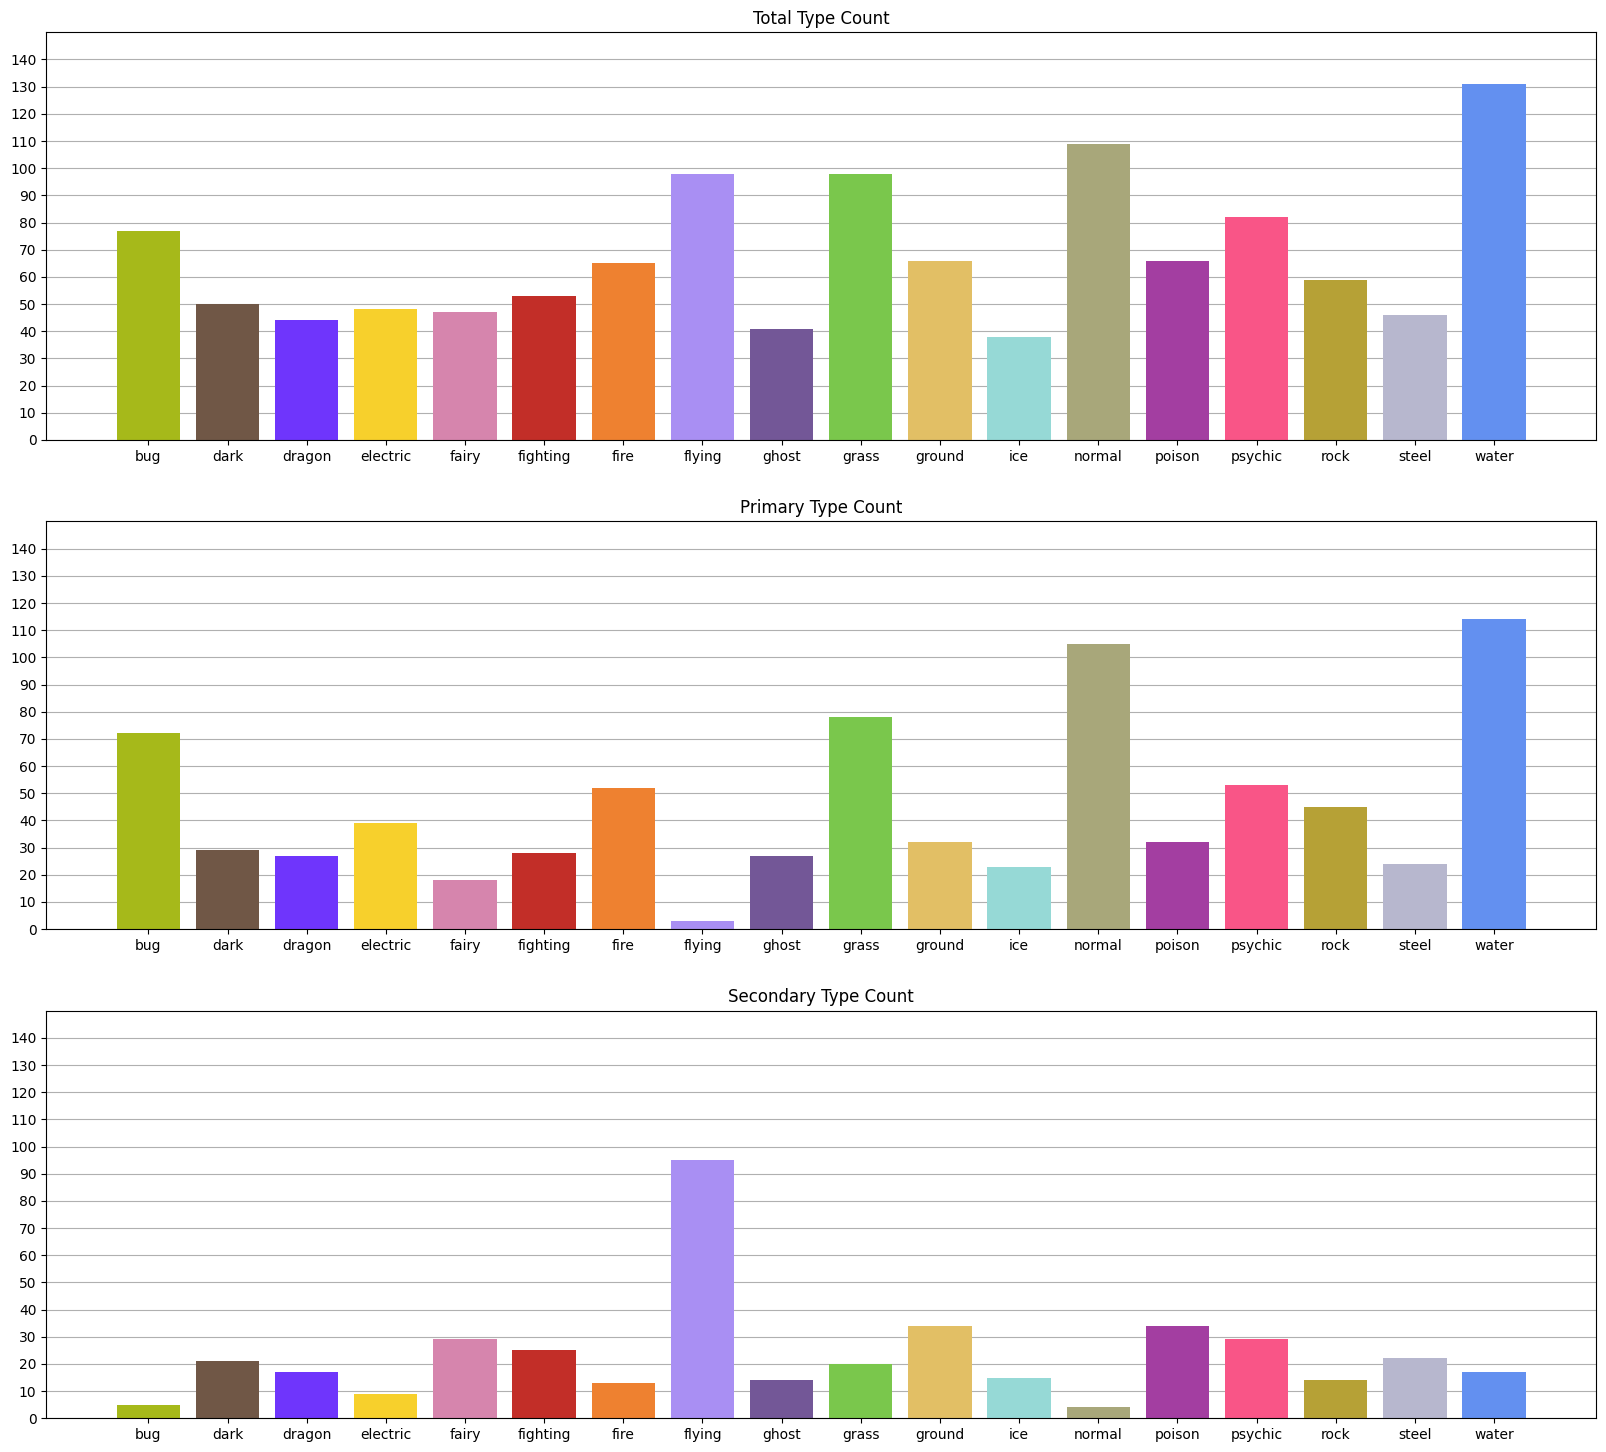

In [16]:
type1_counts = selected_dataframe["type1"].value_counts().to_dict()
type2_counts = selected_dataframe["type2"].value_counts().to_dict()
type_counts = {}

type1_counts = {key: value for key, value in sorted(type1_counts.items())}
type2_counts = {key: value for key, value in sorted(type2_counts.items())}

for key in type1_counts.keys():
    type_counts[key] = type1_counts[key] + type2_counts[key]

# Colours Assigned to each type within Pokemon to make the Graphs look nicer.
type_colours = ['#A6B91A', '#705746', '#6F35FC', '#F7D02C', '#D685AD', '#C22E28', '#EE8130', '#A98FF3', '#735797', '#7AC74C', '#E2BF65', '#96D9D6', '#A8A77A', '#A33EA1', '#F95587', '#B6A136', '#B7B7CE', '#6390F0']

plt.rcParams['figure.figsize'] = (20, 18)
plt.rcParams['figure.dpi'] = 100
fig, [ax1, ax2, ax3] = plt.subplots(ncols=1, nrows=3)

for ax in [ax1, ax2, ax3]:
    ax.set_ylim([0,150])
    ax.set_yticks(range(0, 141, 10))
    ax.set_xticks(range(len(type_counts)), list(type_counts.keys()))
    ax.set_axisbelow(True)
    ax.grid(axis="y")


ax1.set_title("Total Type Count")
ax1.bar(range(len(type_counts)), list(type_counts.values()), color=type_colours)

ax2.set_title("Primary Type Count")
ax2.bar(range(len(type1_counts)), list(type1_counts.values()), color=type_colours)

ax3.set_title("Secondary Type Count")
ax3.bar(range(len(type2_counts)), list(type2_counts.values()), color=type_colours)




What about if we look at the distribution of a secondary types, when we're already given the primary type?

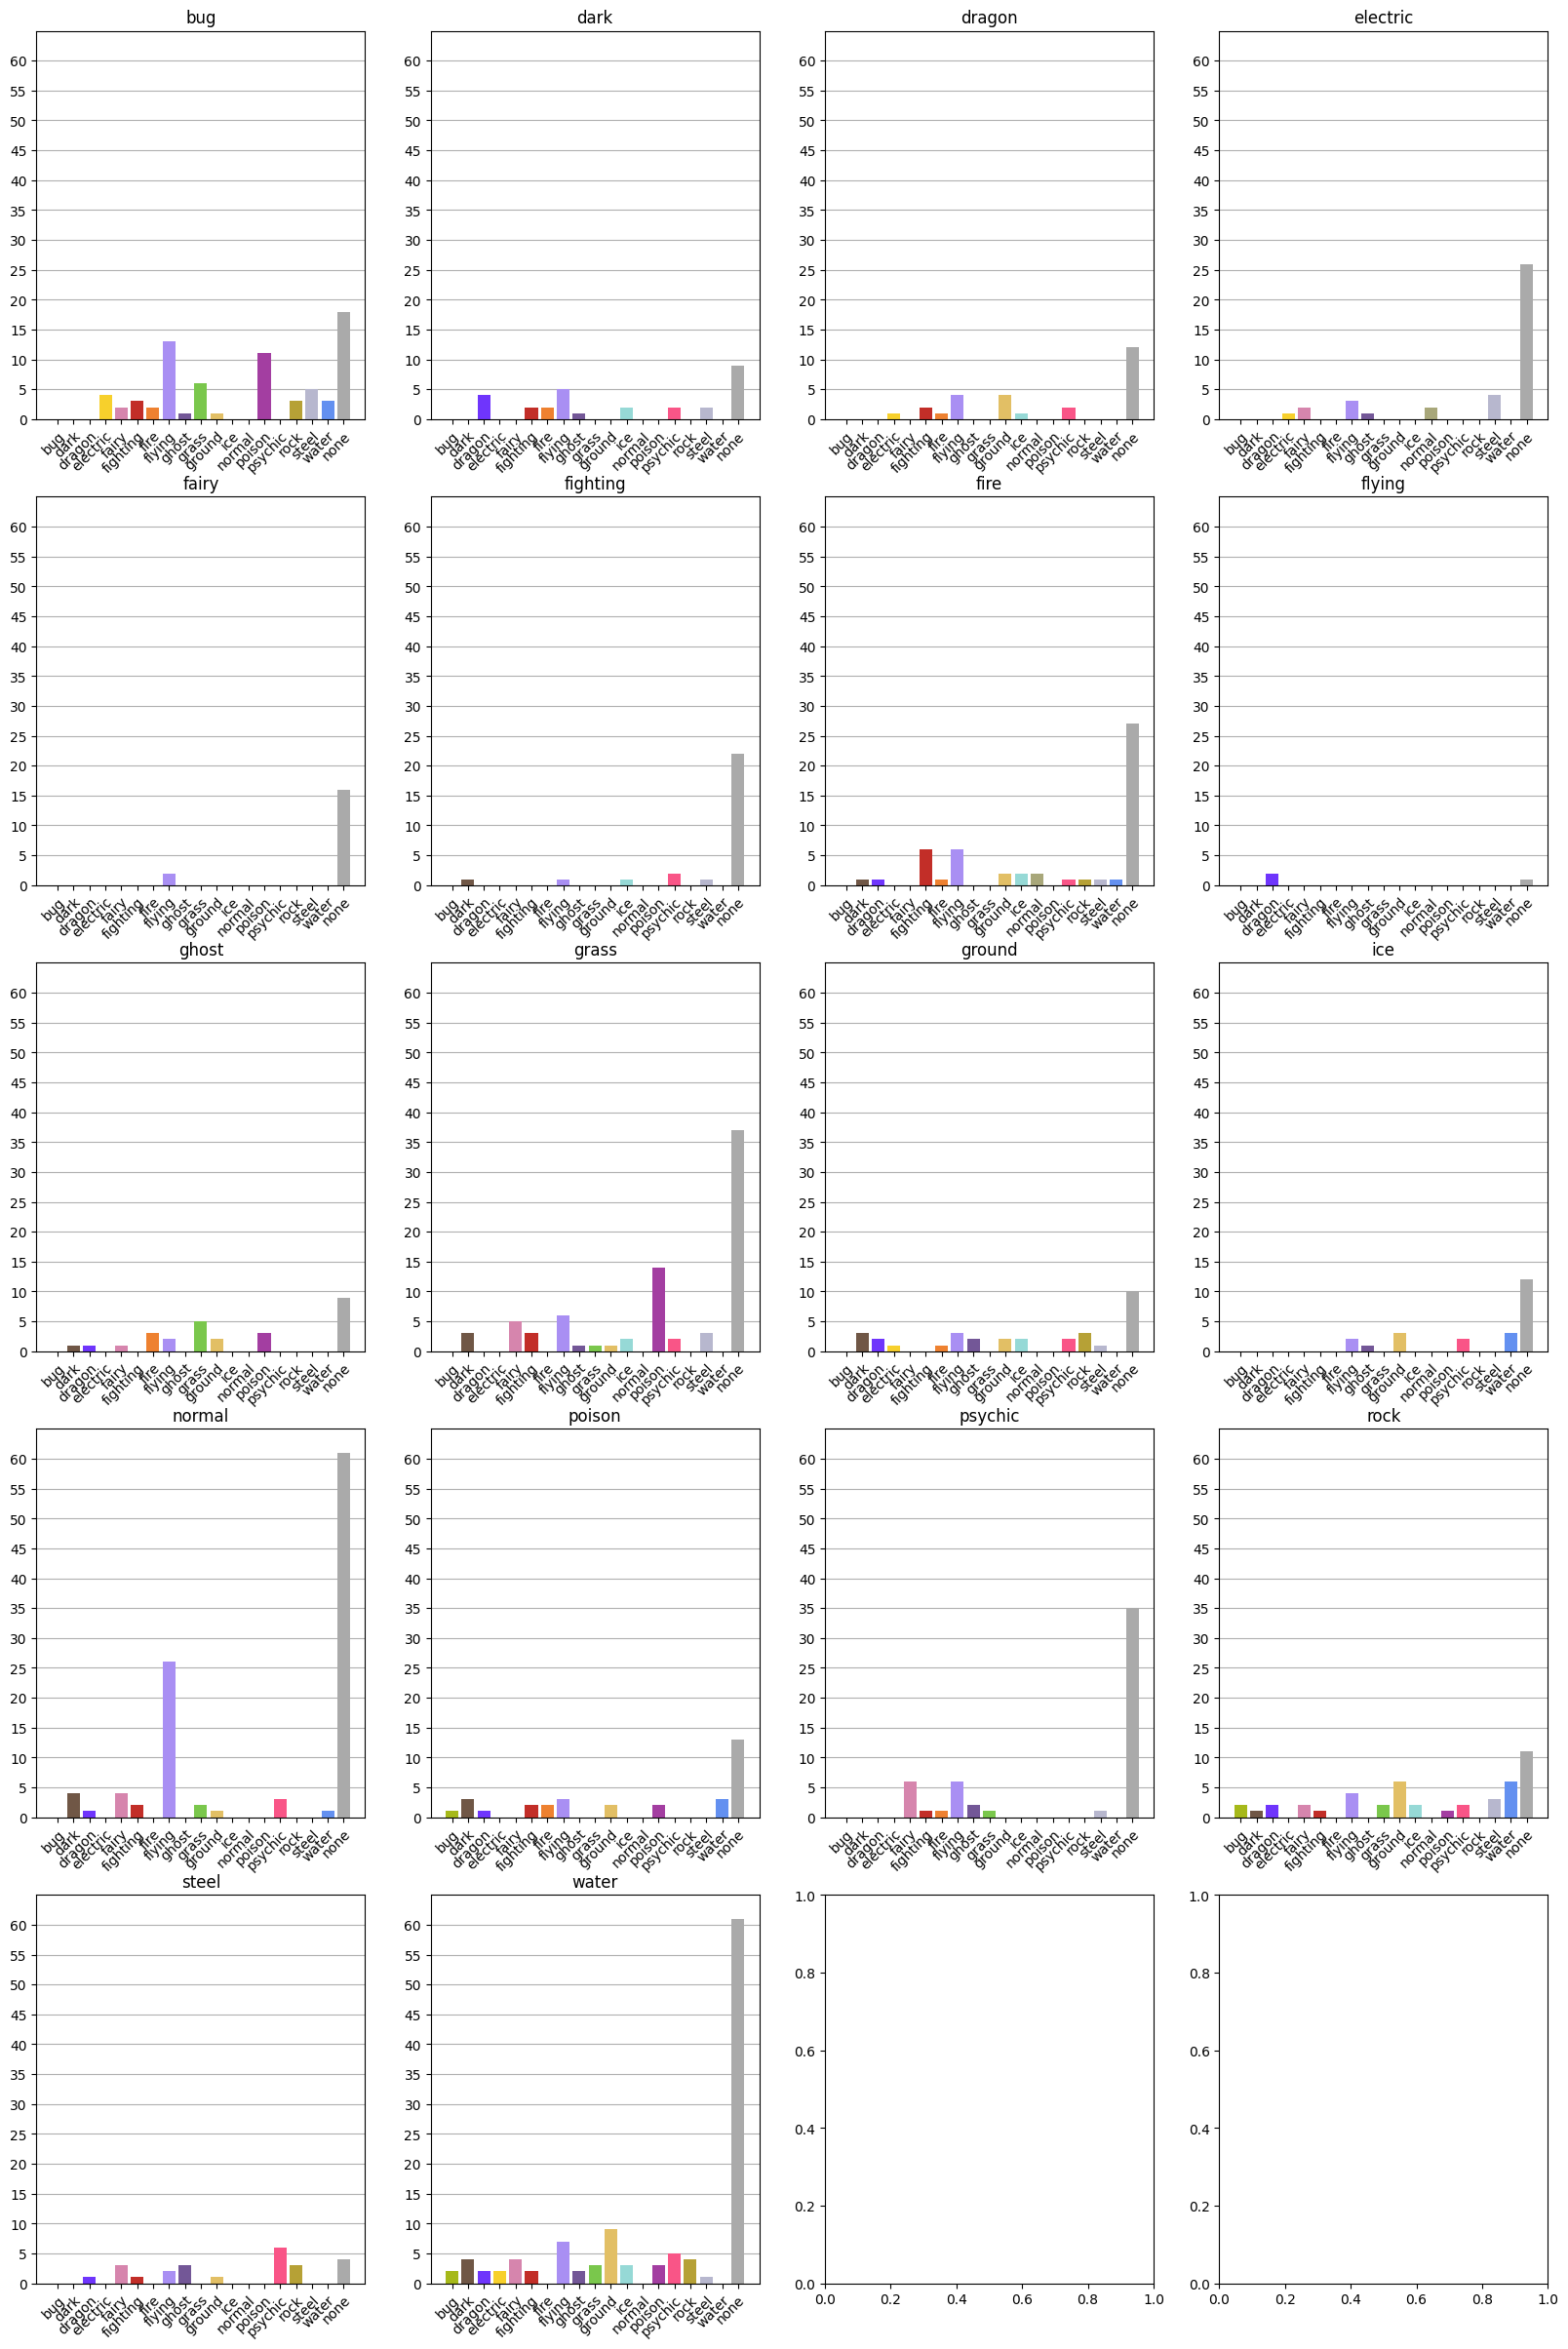

In [53]:
types = selected_dataframe["type1"].unique().tolist()
types = sorted(types)
types.append('none')

type_matches = {}

for poke_type in types:
    type_matches[poke_type] = {}

    for poke_type_2 in types:

        type_matches[poke_type][poke_type_2] = 0

type_matches = {key: value for key, value in sorted(type_matches.items())}

for poke_type1 in types[:-1]:
    type1_selection = selected_dataframe[selected_dataframe['type1'] == poke_type1]

    for poke_type2 in types[:]:

        if poke_type2 == "none":
            type_matches[poke_type1][poke_type2] = type1_selection["type2"].isna().sum()
            continue

        type_matches[poke_type1][poke_type2] =  type1_selection[type1_selection["type2"] == poke_type2].shape[0]


plt.rcParams['figure.figsize'] = (20, 30)
plt.rcParams['figure.dpi'] = 100

fig, [[ax1,ax2,ax3,ax4],[ax5,ax6,ax7,ax8],[ax9,ax10,ax11,ax12],[ax13,ax14,ax15,ax16],[ax17,ax18,ax19,ax20]] = plt.subplots(ncols=4, nrows=5)
type_colours = ['#A6B91A', '#705746', '#6F35FC', '#F7D02C', '#D685AD', '#C22E28', '#EE8130', '#A98FF3', '#735797', '#7AC74C', '#E2BF65', '#96D9D6', '#A8A77A', '#A33EA1', '#F95587', '#B6A136', '#B7B7CE', '#6390F0','#AAAAAA']

axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,ax17,ax18,ax19,ax20]

for i in range(18):
    ax = axes[i]

    ax.set_ylim([0,65])
    ax.set_yticks(range(0, 61, 5))
    
    ax.set_xticks(range(len(types)), types)
    ax.set_xticklabels(types, rotation=45, ha='right', rotation_mode='anchor')

    ax.set_axisbelow(True)
    ax.grid(axis="y")

    ax.set_title(types[i])
    ax.bar(range(len(type_colours)), list(type_matches[types[i]].values()), color=type_colours)


Moving on to our original question. We'll move on to have a look at the distribution of stats among the types. Though there will be a few clear outliers, it might be difficult at this intial stage to draw meaningful conclusions. But it is still an important first step towards discovering if there are any actionable insights.

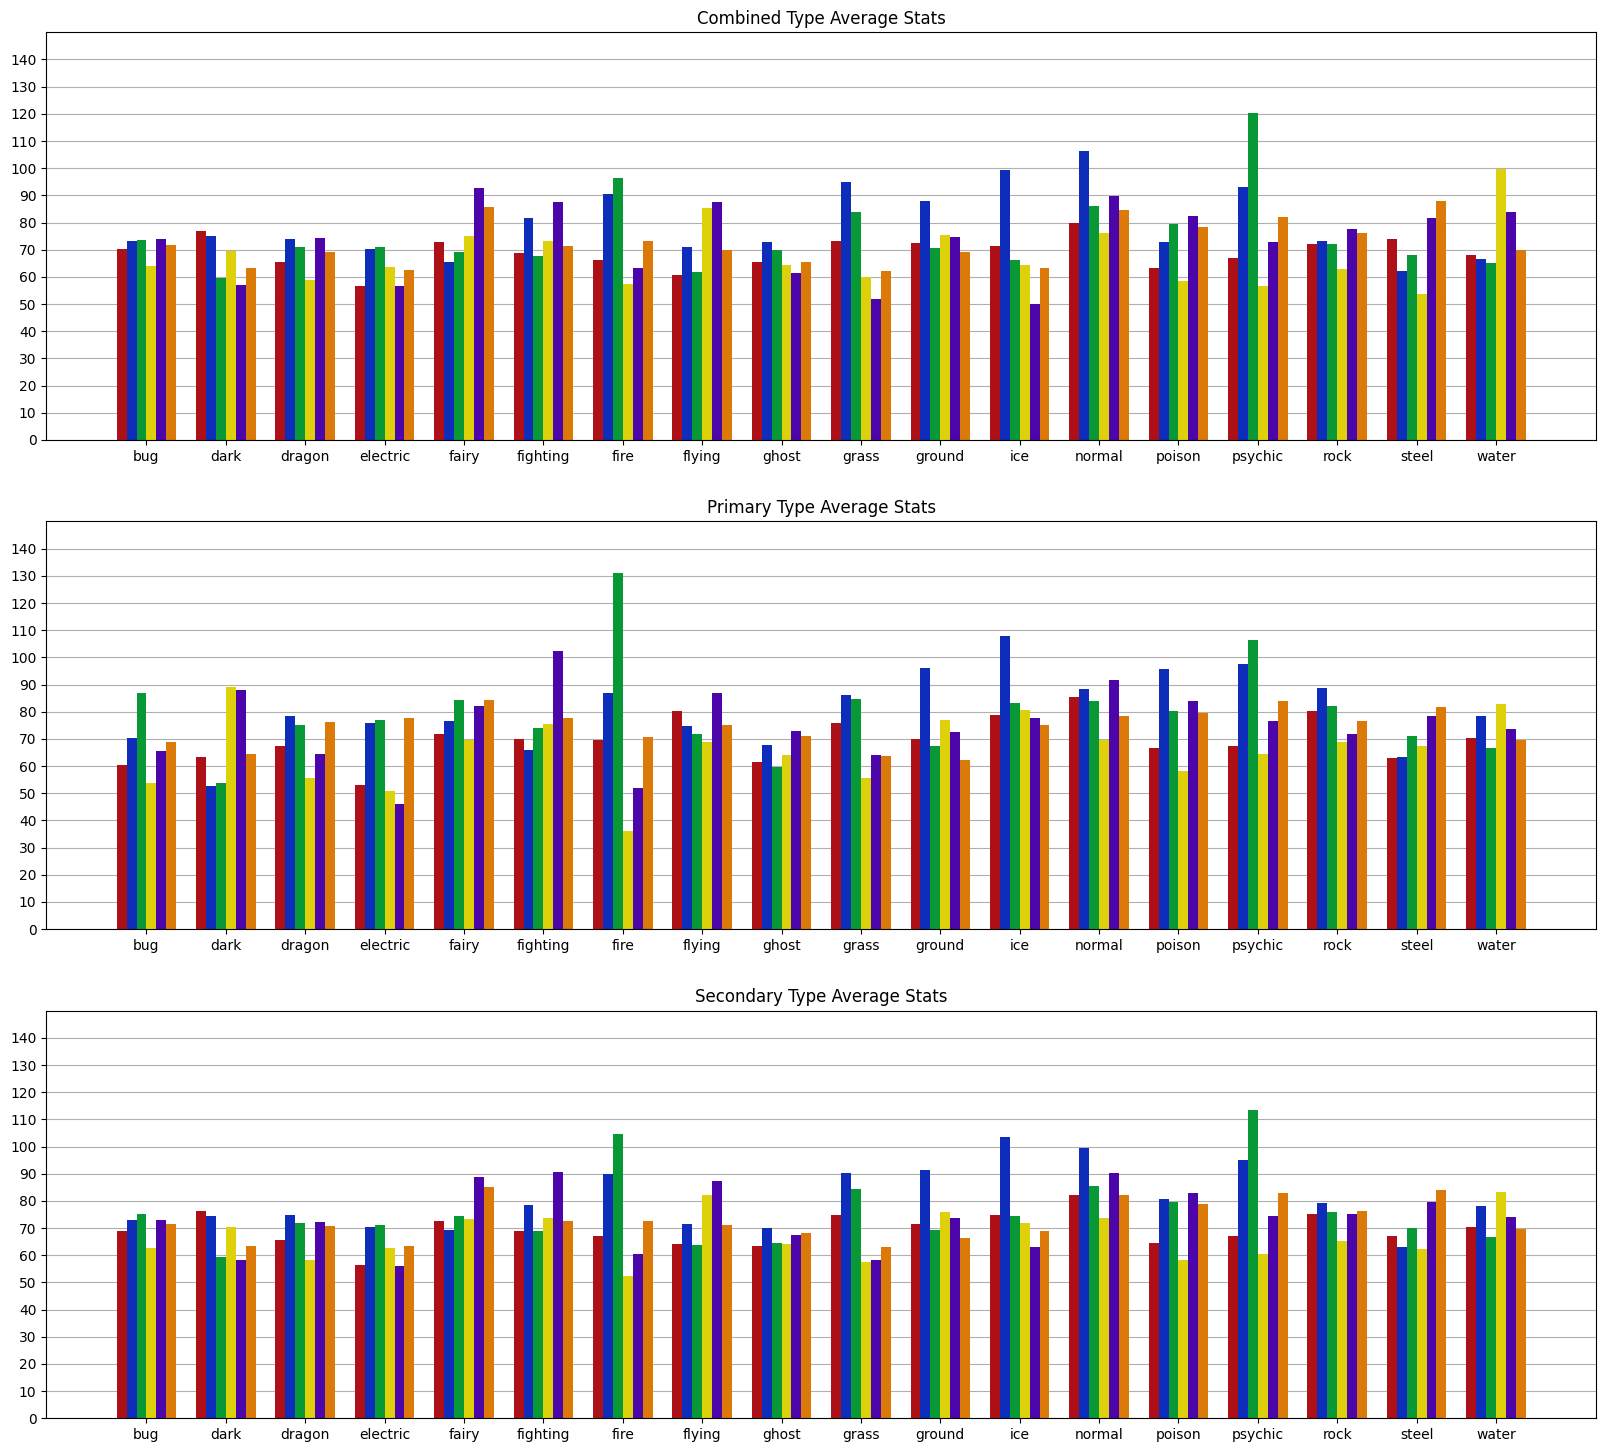

In [ ]:
types = selected_dataframe["type1"].value_counts().to_dict().keys()

# Contained stats are hp, attack, defense, speed, sp_attack, sp_defense, total_count
type1_total_stats = {poke_type: [0,0,0,0,0,0,0] for poke_type in types}
type2_total_stats = {poke_type: [0,0,0,0,0,0,0] for poke_type in types}
combined_total_stats = {poke_type: [0,0,0,0,0,0,0] for poke_type in types}


stats = ["hp", "attack", "defense", "speed", "sp_attack", "sp_defense"]
stats_dataframe = selected_dataframe[["type1", "type2"] + stats]

for index, row in stats_dataframe.iterrows():
    type1 = row["type1"]
    type2 = row["type2"]

    stat_values = [row["hp"], row["attack"], row["defense"], row["speed"], row["sp_attack"], row["sp_defense"], 1]

    type1_total_stats[type1] = [x + y for x,y in zip(type1_total_stats[type1], stat_values)]
    combined_total_stats[type1] = [x + y for x,y in zip(combined_total_stats[type1], stat_values)]

    if type2 not in types: continue

    type2_total_stats[type2] = [x + y for x,y in zip(type2_total_stats[type2], stat_values)]
    combined_total_stats[type2] = [x + y for x,y in zip(combined_total_stats[type2], stat_values)]

type1_average_stats = {}
type2_average_stats = {}
combined_average_stats = {}

for poke_type in types:
    type1_average_stats[poke_type] = [round(stat_total / type1_total_stats[poke_type][6], 2) for stat_total in type1_total_stats[poke_type][:-1]]
    type2_average_stats[poke_type] = [round(stat_total / type2_total_stats[poke_type][6], 2) for stat_total in type2_total_stats[poke_type][:-1]]
    combined_average_stats[poke_type] = [round(stat_total / combined_total_stats[poke_type][6], 2) for stat_total in combined_total_stats[poke_type][:-1]]


plt.rcParams['figure.figsize'] = (20, 18)
plt.rcParams['figure.dpi'] = 100
fig, [ax1, ax2, ax3] = plt.subplots(ncols=1, nrows=3)
stats_colours = ['#ad1117', '#0d2dba', '#089936', '#ded00b', '#4c05a8', '#db7909']

for ax in [ax1, ax2, ax3]:
    ax.set_ylim([0,150])
    ax.set_yticks(range(0, 141, 10))
    ax.set_xticks(range(len(type_counts)), list(type_counts.keys()))
    ax.set_axisbelow(True)
    ax.grid(axis="y")

bar_width = 0.125

ax1.set_title("Combined Type Average Stats")
ax2.set_title("Primary Type Average Stats")
ax3.set_title("Secondary Type Average Stats")


offset_multipler = 0 
for i in range(len(stats)):
    spacing = [x + (bar_width * (-2.5 + offset_multipler)) for x in range(len(types))]
    values = [type1_average_stats[poke_type][i] for poke_type in types]
    ax1.bar(spacing, values, bar_width, color=stats_colours[i])
    offset_multipler += 1

offset_multipler = 0 
for i in range(len(stats)):
    spacing = [x + (bar_width * (-2.5 + offset_multipler)) for x in range(len(types))]
    values = [type2_average_stats[poke_type][i] for poke_type in types]
    ax2.bar(spacing, values, bar_width, color=stats_colours[i])
    offset_multipler += 1

offset_multipler = 0 
for i in range(len(stats)):
    spacing = [x + (bar_width * (-2.5 + offset_multipler)) for x in range(len(types))]
    values = [combined_average_stats[poke_type][i] for poke_type in types]
    ax3.bar(spacing, values, bar_width, color=stats_colours[i])
    offset_multipler += 1
